<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab13_Multinominal_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x_data=np.array([1,2,2,3,3,1,4,3,5,3,6,2],np.float32).reshape(6,2)
y_data=np.array([0,0,1,1,2,2],np.float32).reshape(6,1)

In [ ]:
x_data.shape

(6, 2)

In [ ]:
x_data.shape[1]

2

In [ ]:
y_data.shape[1]

1

In [ ]:
input_dim=x_data.shape[1]
units=y_data.shape[1]

input(nxi), output(nxj) i는 인풋 갯수 j는 아웃풋 갯수, n데이터 갯수
W와 b의 갯수는? W는 ixj개, [i,j] b는 j개 [1,j]

# Logistic regression

In [ ]:
learning_rate=1e-2

그렇다면 w와 b의 사이즈를 어떻게 정하는가? 일일이 i와 j의 크기를 넣어줘야 하나? 아니면 자동으로 정할 수 있는가?
x_data와 y_data의 dimension을 뽑을수 있으면 가능함.
- x_data.shape[숫자] : 해당숫자-1에 해당하는 dimension을 뽑음.

In [ ]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [ ]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [ ]:
b=tf.Variable(b_init(shape=(units,)),dtype='float32')

In [ ]:
for i in range(10000):
  # loss
  with tf.GradientTape() as tape:
    z=tf.matmul(x_data,w)+b   #매트릭스 곱하기 : np.matmul()
    hypothesis=tf.divide(1,1+tf.math.exp(-z)) #sigmoid
    loss=-tf.reduce_mean(y_data*tf.math.log(hypothesis)+(1-y_data)*tf.math.log(1-hypothesis)) #cross entropy

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 1000==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 0.1354174017906189
iteration 1000 loss 0.12680260837078094
iteration 2000 loss 0.11923282593488693
iteration 3000 loss 0.11253029853105545
iteration 4000 loss 0.10655491799116135
iteration 5000 loss 0.10119462758302689
iteration 6000 loss 0.09635914117097855
iteration 7000 loss 0.0919748842716217
iteration 8000 loss 0.08798113465309143
iteration 9000 loss 0.08432791382074356


In [ ]:
w.numpy()

array([[1.9538403],
       [0.729815 ]], dtype=float32)

In [ ]:
b.numpy()

array([-8.221146], dtype=float32)

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.9538403],
       [0.729815 ]], dtype=float32)>

In [ ]:
tf.divide(1,1+tf.math.exp(-z))

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.0081014 ],
       [0.10678716],
       [0.16386306],
       [0.85614413],
       [0.9767388 ],
       [0.99304587]], dtype=float32)>

In [ ]:
y_data

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# subclassing

In [ ]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    logits=tf.matmul(inputs,self.w)+self.b
    return tf.math.sigmoid(logits)

In [ ]:
# loss
loss=tf.keras.losses.BinaryCrossentropy()   #yes no만 있는 crossentropy

In [ ]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [ ]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [ ]:
# learning
for i in range(10000):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

  if i % 2000==0:
    print('{} {}'.format(i,loss(y_data,model(x_data))))


0 0.15634573996067047
2000 0.13510668277740479
4000 0.11899277567863464
6000 0.10636401921510696
8000 0.09620372205972672


In [ ]:
model.w.numpy()

array([[2.0406716],
       [0.7923428]], dtype=float32)

In [ ]:
model.b.numpy()

array([-8.667864], dtype=float32)

In [ ]:
model(x_data)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.00641608],
       [0.0989013 ],
       [0.14760554],
       [0.8666723 ],
       [0.98040175],
       [0.99429595]], dtype=float32)>

In [ ]:
y_data

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Sequential model

In [ ]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,activation='sigmoid',kernel_initializer='random_normal'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


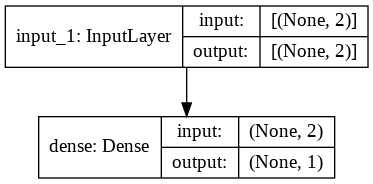

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
# learning
model.fit(x_data,y_data,epochs=10000,verbose=0)

In [ ]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 101ms/step - loss: 0.1471


0.1471317559480667

In [ ]:
model.get_weights()

[array([[1.4817607 ],
        [0.32572368]], dtype=float32), array([-5.617701], dtype=float32)]

In [ ]:
y_data

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
model.predict(x_data)

array([[0.0297567 ],
       [0.15749198],
       [0.30012655],
       [0.78355634],
       [0.94093716],
       [0.980627  ]], dtype=float32)